In [1]:
#import all useful libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#import our data
data = pd.read_csv('penguins.csv')

print(data.head())
data_clean = data.dropna()

   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [5]:
# Select the attributes for projection
att = data_clean.iloc[:, 3:5]
print(att.head())

   bill_length_mm  bill_depth_mm
0            39.1           18.7
1            39.5           17.4
2            40.3           18.0
4            36.7           19.3
5            39.3           20.6


In [6]:
# Define the projection line and compute the unit vector
line = np.array([1.3, 2.5])
unit_line = line / np.linalg.norm(line, 2)
proj = np.dot(att, unit_line)[:, np.newaxis] * unit_line


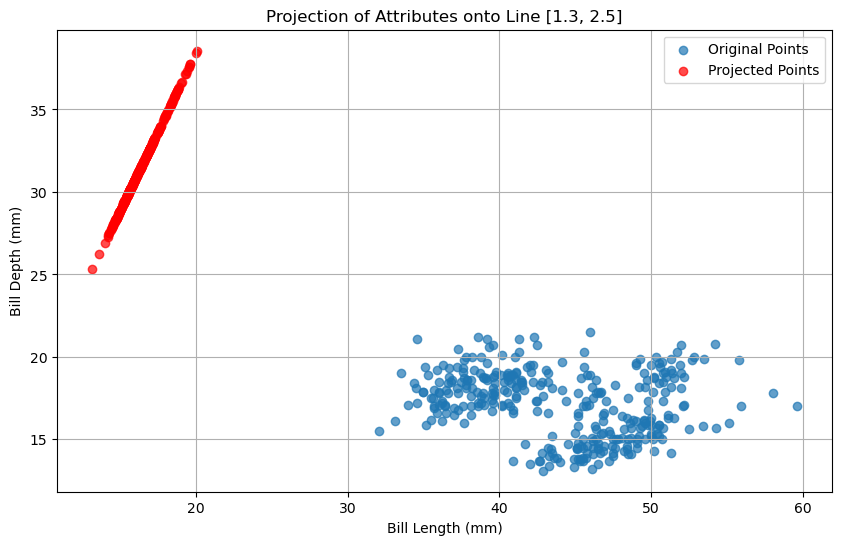

In [7]:
# Plot the original points and projected points
plt.figure(figsize=(10, 6))
plt.scatter(att.iloc[:, 0], att.iloc[:, 1], alpha=0.7, label='Original Points')
plt.scatter(proj[:, 0], proj[:, 1], color='red', alpha=0.7, label='Projected Points')
plt.title('Projection of Attributes onto Line [1.3, 2.5]')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Select more attributes for covariance calculation
att1 = data_clean.iloc[:, 3:7]

In [13]:
# Find the mean of the data
mu = att1.mean()

In [14]:
# Center the data
att1_bar = att1 - mu

In [15]:
# Compute the covariance matrix using dot product (inner product)
cov1 = np.dot(att1_bar.T, att1_bar) / (att1_bar.shape[0] - 1)
print("Covariance matrix using inner product:")
print(cov1)
# Compute the covariance matrix using dot product (inner product)
cov1 = np.dot(att1_bar.T, att1_bar) / (att1_bar.shape[0] - 1)
print("Covariance matrix using inner product:")
print(cov1)


Covariance matrix using inner product:
[[ 2.99063334e+01 -2.46209134e+00  5.00581949e+01  2.59562330e+03]
 [-2.46209134e+00  3.87788831e+00 -1.59472485e+01 -7.48456122e+02]
 [ 5.00581949e+01 -1.59472485e+01  1.96441677e+02  9.85219165e+03]
 [ 2.59562330e+03 -7.48456122e+02  9.85219165e+03  6.48372488e+05]]
Covariance matrix using inner product:
[[ 2.99063334e+01 -2.46209134e+00  5.00581949e+01  2.59562330e+03]
 [-2.46209134e+00  3.87788831e+00 -1.59472485e+01 -7.48456122e+02]
 [ 5.00581949e+01 -1.59472485e+01  1.96441677e+02  9.85219165e+03]
 [ 2.59562330e+03 -7.48456122e+02  9.85219165e+03  6.48372488e+05]]


In [16]:
# Compute the covariance matrix using pandas built-in function
print("Covariance matrix using pandas built-in function:")
print(att1_bar.cov())

Covariance matrix using pandas built-in function:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm          29.906333      -2.462091          50.058195   
bill_depth_mm           -2.462091       3.877888         -15.947248   
flipper_length_mm       50.058195     -15.947248         196.441677   
body_mass_g           2595.623304    -748.456122        9852.191649   

                     body_mass_g  
bill_length_mm       2595.623304  
bill_depth_mm        -748.456122  
flipper_length_mm    9852.191649  
body_mass_g        648372.487699  


In [17]:
# Additional analysis
# Compute the multivariate mean vector
mean_vector = att1.mean()
print("Multivariate Mean Vector:")
print(mean_vector)

Multivariate Mean Vector:
bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64


In [18]:
# Compute the sample covariance matrix (outer product method)
cov_matrix_outer = np.cov(att1_bar.T)
print("Sample Covariance Matrix (Outer Product):")
print(cov_matrix_outer)

Sample Covariance Matrix (Outer Product):
[[ 2.99063334e+01 -2.46209134e+00  5.00581949e+01  2.59562330e+03]
 [-2.46209134e+00  3.87788831e+00 -1.59472485e+01 -7.48456122e+02]
 [ 5.00581949e+01 -1.59472485e+01  1.96441677e+02  9.85219165e+03]
 [ 2.59562330e+03 -7.48456122e+02  9.85219165e+03  6.48372488e+05]]


In [19]:
# Compute the correlation between bill_length_mm and bill_depth_mm
bill_length_centered = att1_bar['bill_length_mm']
bill_depth_centered = att1_bar['bill_depth_mm']
correlation = np.dot(bill_length_centered, bill_depth_centered) / (
    np.linalg.norm(bill_length_centered) * np.linalg.norm(bill_depth_centered)
)
print(f"Correlation between bill_length_mm and bill_depth_mm: {correlation}")


Correlation between bill_length_mm and bill_depth_mm: -0.2286256359130291


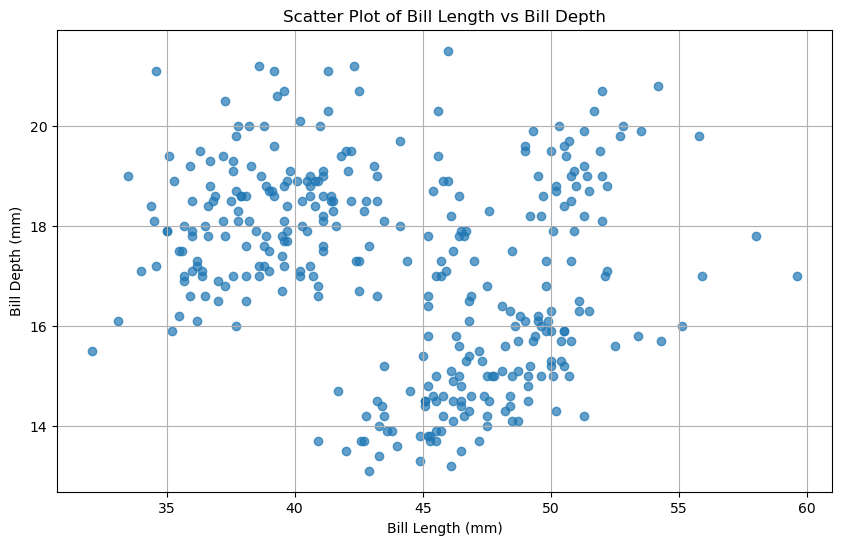

In [20]:
# Scatter plot of bill length and bill depth
plt.figure(figsize=(10, 6))
plt.scatter(att['bill_length_mm'], att['bill_depth_mm'], alpha=0.7)
plt.title('Scatter Plot of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid(True)
plt.show()


In [21]:
# Compute the covariance matrix for categorical attributes
categorical_data = data_clean[['species', 'island', 'sex']]
categorical_data_encoded = pd.get_dummies(categorical_data, drop_first=True)
cov_matrix_categorical = np.cov(categorical_data_encoded.T)
print("Covariance Matrix for Categorical Attributes:")
print(cov_matrix_categorical)


Covariance Matrix for Categorical Attributes:
[[ 1.62994320e-01 -7.31936756e-02  1.29165310e-01 -2.89084265e-02
  -9.22609356e-04]
 [-7.31936756e-02  2.30344803e-01 -1.32394443e-01 -5.05897464e-02
   2.90350592e-03]
 [ 1.29165310e-01 -1.32394443e-01  2.33637252e-01 -5.22902420e-02
  -1.62813416e-04]
 [-2.89084265e-02 -5.05897464e-02 -5.22902420e-02  1.21585441e-01
  -2.14370998e-03]
 [-9.22609356e-04  2.90350592e-03 -1.62813416e-04 -2.14370998e-03
   2.50732660e-01]]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


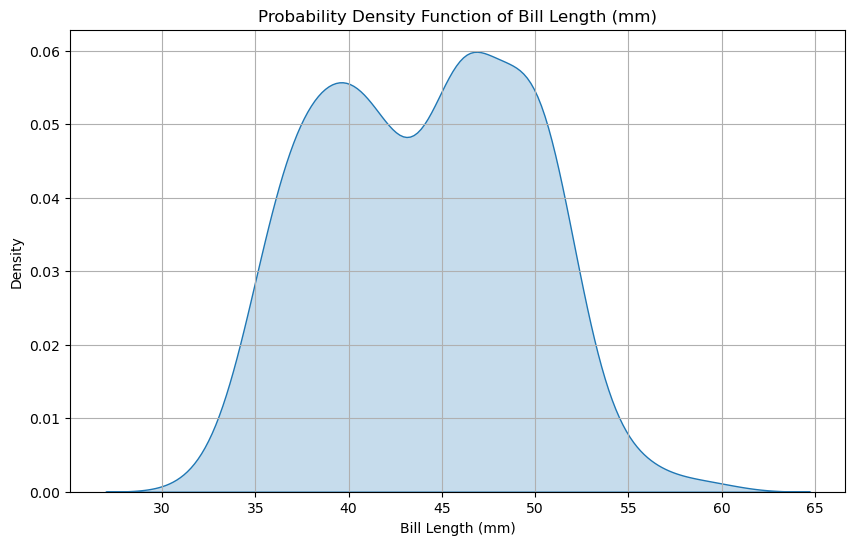

In [29]:

# Plot the probability density function of the first numerical attribute (bill_length_mm)
plt.figure(figsize=(10, 6))
sns.kdeplot(data_clean['bill_length_mm'], fill=True)
plt.title('Probability Density Function of Bill Length (mm)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [27]:
# Covariance analysis to find the largest and smallest covariance
cov_values = cov1[np.triu_indices_from(cov1, k=1)]
largest_cov = np.max(cov_values)
smallest_cov = np.min(cov_values)
largest_cov_indices = np.unravel_index(np.argmax(cov1, axis=None), cov1.shape)
smallest_cov_indices = np.unravel_index(np.argmin(cov1, axis=None), cov1.shape)
attributes = att1.columns
largest_cov_pair = (attributes[largest_cov_indices[0]], attributes[largest_cov_indices[1]])
smallest_cov_pair = (attributes[smallest_cov_indices[0]], attributes[smallest_cov_indices[1]])

print(f"Largest Covariance: {largest_cov} between {largest_cov_pair}")
print(f"Smallest Covariance: {smallest_cov} between {smallest_cov_pair}")

Largest Covariance: 9852.191649480805 between ('body_mass_g', 'body_mass_g')
Smallest Covariance: -748.456121784435 between ('bill_depth_mm', 'body_mass_g')


In [30]:
'''
To start, I loaded the “penguins.csv” dataset into a DataFrame using pandas.
After loading the data, I displayed the first few rows to get an initial understanding of its structure, including the number of rows, columns, and data types. 
Then, I created a scatter plot of two key attributes,bill_length_mm and bill_depth_mm, to visualize their relationship.
I projected these data points onto a line defined by the vector [1.74, -2.15] and plotted both the original and projected points, which allowed me to examine the data from a different perspective.

For my advanced statistical analysis, I first computed the multivariate mean vector to find the average value for each attribute in the dataset. 
Next, I calculated the sample covariance matrix using both the inner product and outer product methods to understand the variance and covariance between numerical attributes. 
I computed the correlation between bill_length_mm and bill_depth_mm by finding the cosine of the angle between their centered vectors and presented this with a scatter plot. 
For categorical data, I encoded the species, island, and sex attributes and computed their covariance matrix.
I also plotted the probability density function for bill_length_mm under the assumption of normal distribution. 
Finally, I conducted a covariance analysis to identify the pairs of attributes with the largest and smallest covariances.
'''

'\nTo start, I loaded the “penguins.csv” dataset into a DataFrame using pandas.\nAfter loading the data, I displayed the first few rows to get an initial understanding of its structure, including the number of rows, columns, and data types. \nThen, I created a scatter plot of two key attributes,bill_length_mm and bill_depth_mm, to visualize their relationship.\nI projected these data points onto a line defined by the vector [1.74, -2.15] and plotted both the original and projected points, which allowed me to examine the data from a different perspective.\n\nFor my advanced statistical analysis, I first computed the multivariate mean vector to find the average value for each attribute in the dataset. \nNext, I calculated the sample covariance matrix using both the inner product and outer product methods to understand the variance and covariance between numerical attributes. \nI computed the correlation between bill_length_mm and bill_depth_mm by finding the cosine of the angle between t